In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

students_df = pd.read_csv('studentdata.csv')
teachers_df = pd.read_csv('facultydata.csv')

students_df['Login Number'] = range(2001, 2001 + len(students_df))
students_df['Roll No'] = range(1, len(students_df) + 1)

#preprocessing
def preprocess_data(students_df):
    students_df = pd.get_dummies(students_df, columns=['Domain'])
    return students_df
def perform_clustering(students_df):
    kmeans = KMeans(n_clusters=30)
    students_df['Cluster'] = kmeans.fit_predict(students_df.drop(['Login Number', 'Name', 'Batch'], axis=1))
    return students_df




In [74]:
def generate_seating_plan(students_df):
    exam_rooms = {}
    room_capacities = {f'Room{i+1}': np.random.randint(25, 36) for i in range(30)}

    def assign_students_to_rooms(cluster_students):
        for room, capacity in room_capacities.items():
            if room not in exam_rooms:
                exam_rooms[room] = {'Students': [], 'Capacity': capacity}
            available_seats = exam_rooms[room]['Capacity'] - len(exam_rooms[room]['Students'])
            if available_seats > 0:
                assigned_students = cluster_students[:available_seats]
                exam_rooms[room]['Students'].extend(assigned_students)
                cluster_students = cluster_students[available_seats:]

                if len(cluster_students) == 0:
                    break

    for cluster in students_df['Cluster'].unique():
        cluster_students = students_df[students_df['Cluster'] == cluster]['Login Number'].tolist()
        assign_students_to_rooms(cluster_students)

    return exam_rooms

In [75]:
def allocate_faculty_to_rooms(exam_rooms, teachers_df):
    teachers_df_iter = iter(teachers_df.iterrows())
    for room, info in exam_rooms.items():
        teacher_row = next(teachers_df_iter, None)
        if teacher_row is not None:
            teacher_login, teacher_name, teacher_domain = teacher_row[1]
            exam_rooms[room]['Faculty'] = [(teacher_login, teacher_name)]

    return exam_rooms

students_df = preprocess_data(students_df)
students_df = perform_clustering(students_df)
exam_rooms = generate_seating_plan(students_df)
exam_rooms = allocate_faculty_to_rooms(exam_rooms, teachers_df)


In [76]:
with open('seating_plan.csv', 'w') as f:
    f.write("Room Number,Student Name,Roll No,Domain,Faculty Member\n")
    for room, info in exam_rooms.items():
        for student in info['Students']:
            faculty_assigned = f"{info['Faculty'][0][1]} ({info['Faculty'][0][0]})" if 'Faculty' in info else ''
            student_row = students_df.loc[students_df['Login Number'] == student]
            student_name = student_row['Name'].values[0]
            roll_no = student_row['Roll No'].values[0]
            domain_row = student_row[['Domain_CS', 'Domain_AI', 'Domain_BA', 'Domain_SE']].idxmax(axis=1).str.split('_').str[1]
            domain = domain_row.iloc[0] if not domain_row.empty else ''  # Extract domain from the list if not empty
            f.write(f"{room},{student_name},{roll_no},{domain},{faculty_assigned}\n")

print("data written to seating_plan.csv")

data written to seating_plan.csv


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


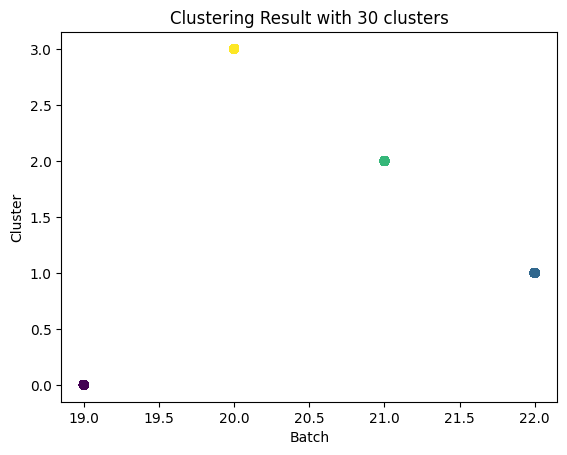

Number of clusters assigned: 30


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

students_df = pd.read_csv('studentdata.csv')
def preprocess_data(students_df):
    students_df = pd.get_dummies(students_df, columns=['Domain'])
    return students_df
def perform_clustering(students_df):
    kmeans = KMeans(n_clusters=30)  
    students_df['Cluster'] = kmeans.fit_predict(students_df[['Batch']])
    return students_df, kmeans.n_clusters

students_df = preprocess_data(students_df)
students_df, num_clusters = perform_clustering(students_df)

plt.scatter(students_df['Batch'], students_df['Cluster'], c=students_df['Cluster'], cmap='viridis')
plt.xlabel('Batch')
plt.ylabel('Cluster')
plt.title(f'Clustering Result with {num_clusters} clusters')
plt.show()

print(f"Number of clusters assigned: {num_clusters}")


In [77]:
import pandas as pd

def print_seating_plan(roll_number):
    seating_plan_df = pd.read_csv('seating_plan.csv')
    row = seating_plan_df[seating_plan_df['Roll No'] == roll_number]
    if not row.empty:
        print(row)
    else:
        print("Roll number not found in the seating plan.")

roll_number = int(input("Enter Roll Number: "))
print_seating_plan(roll_number)


    Room Number Student Name  Roll No Domain  Faculty Member
131       Room5       Sufyan      132     AI  Dr Usama (105)


In [71]:
import pandas as pd

def check_faculty_assignment(login_number):
    seating_plan_df = pd.read_csv('seating_plan.csv')
    filtered_rows = seating_plan_df[seating_plan_df['Faculty Member'].str.contains(f"({login_number})")]
    if not filtered_rows.empty:
        unique_rooms = filtered_rows['Room Number'].unique()
        for room in unique_rooms:
            print("Your assigned room is: ", room)
    else:
        print("Login number not found in the seating plan.")
login_number = input("Enter Faculty Login Number: ")
check_faculty_assignment(login_number)



Your assigned room is:  Room2


C:\Users\Hp\AppData\Local\Temp\ipykernel_13388\290322849.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_rows = seating_plan_df[seating_plan_df['Faculty Member'].str.contains(f"({login_number})")]
